In [1]:
import numpy as np
import matplotlib.pyplot as plt

from poles_roots.plotting import phase_plot
from poles_roots.aaa import AAA
plt.style.use("/home/jakeb/development/poles-and-roots/notebooks/science.mplstyle")

In [2]:
def f(z):
    return np.sin(np.sqrt(z**2+1)) - z

def f_prime(z):
    return z*np.cos(np.sqrt(z**2 + 1))/np.sqrt(z**2 + 1) - 1

def F(z):
    return (np.sin(np.sqrt(z**2+1)) - z)*(-np.sin(np.sqrt(z**2+1)) - z)

def F_prime(z):
    return (-z - np.sin(np.sqrt(z**2 + 1)))*(z*np.cos(np.sqrt(z**2 + 1))/np.sqrt(z**2 + 1) - 1) + (-z + np.sin(np.sqrt(z**2 + 1)))*(-z*np.cos(np.sqrt(z**2 + 1))/np.sqrt(z**2 + 1) - 1)

In [3]:
x = np.linspace(-5, 5, num=50)
y = np.linspace(-5, 5, num=50)
xx, yy = np.meshgrid(x, y)
z = xx.ravel() + yy.ravel()*1j

In [28]:
r = AAA(f(z), z)

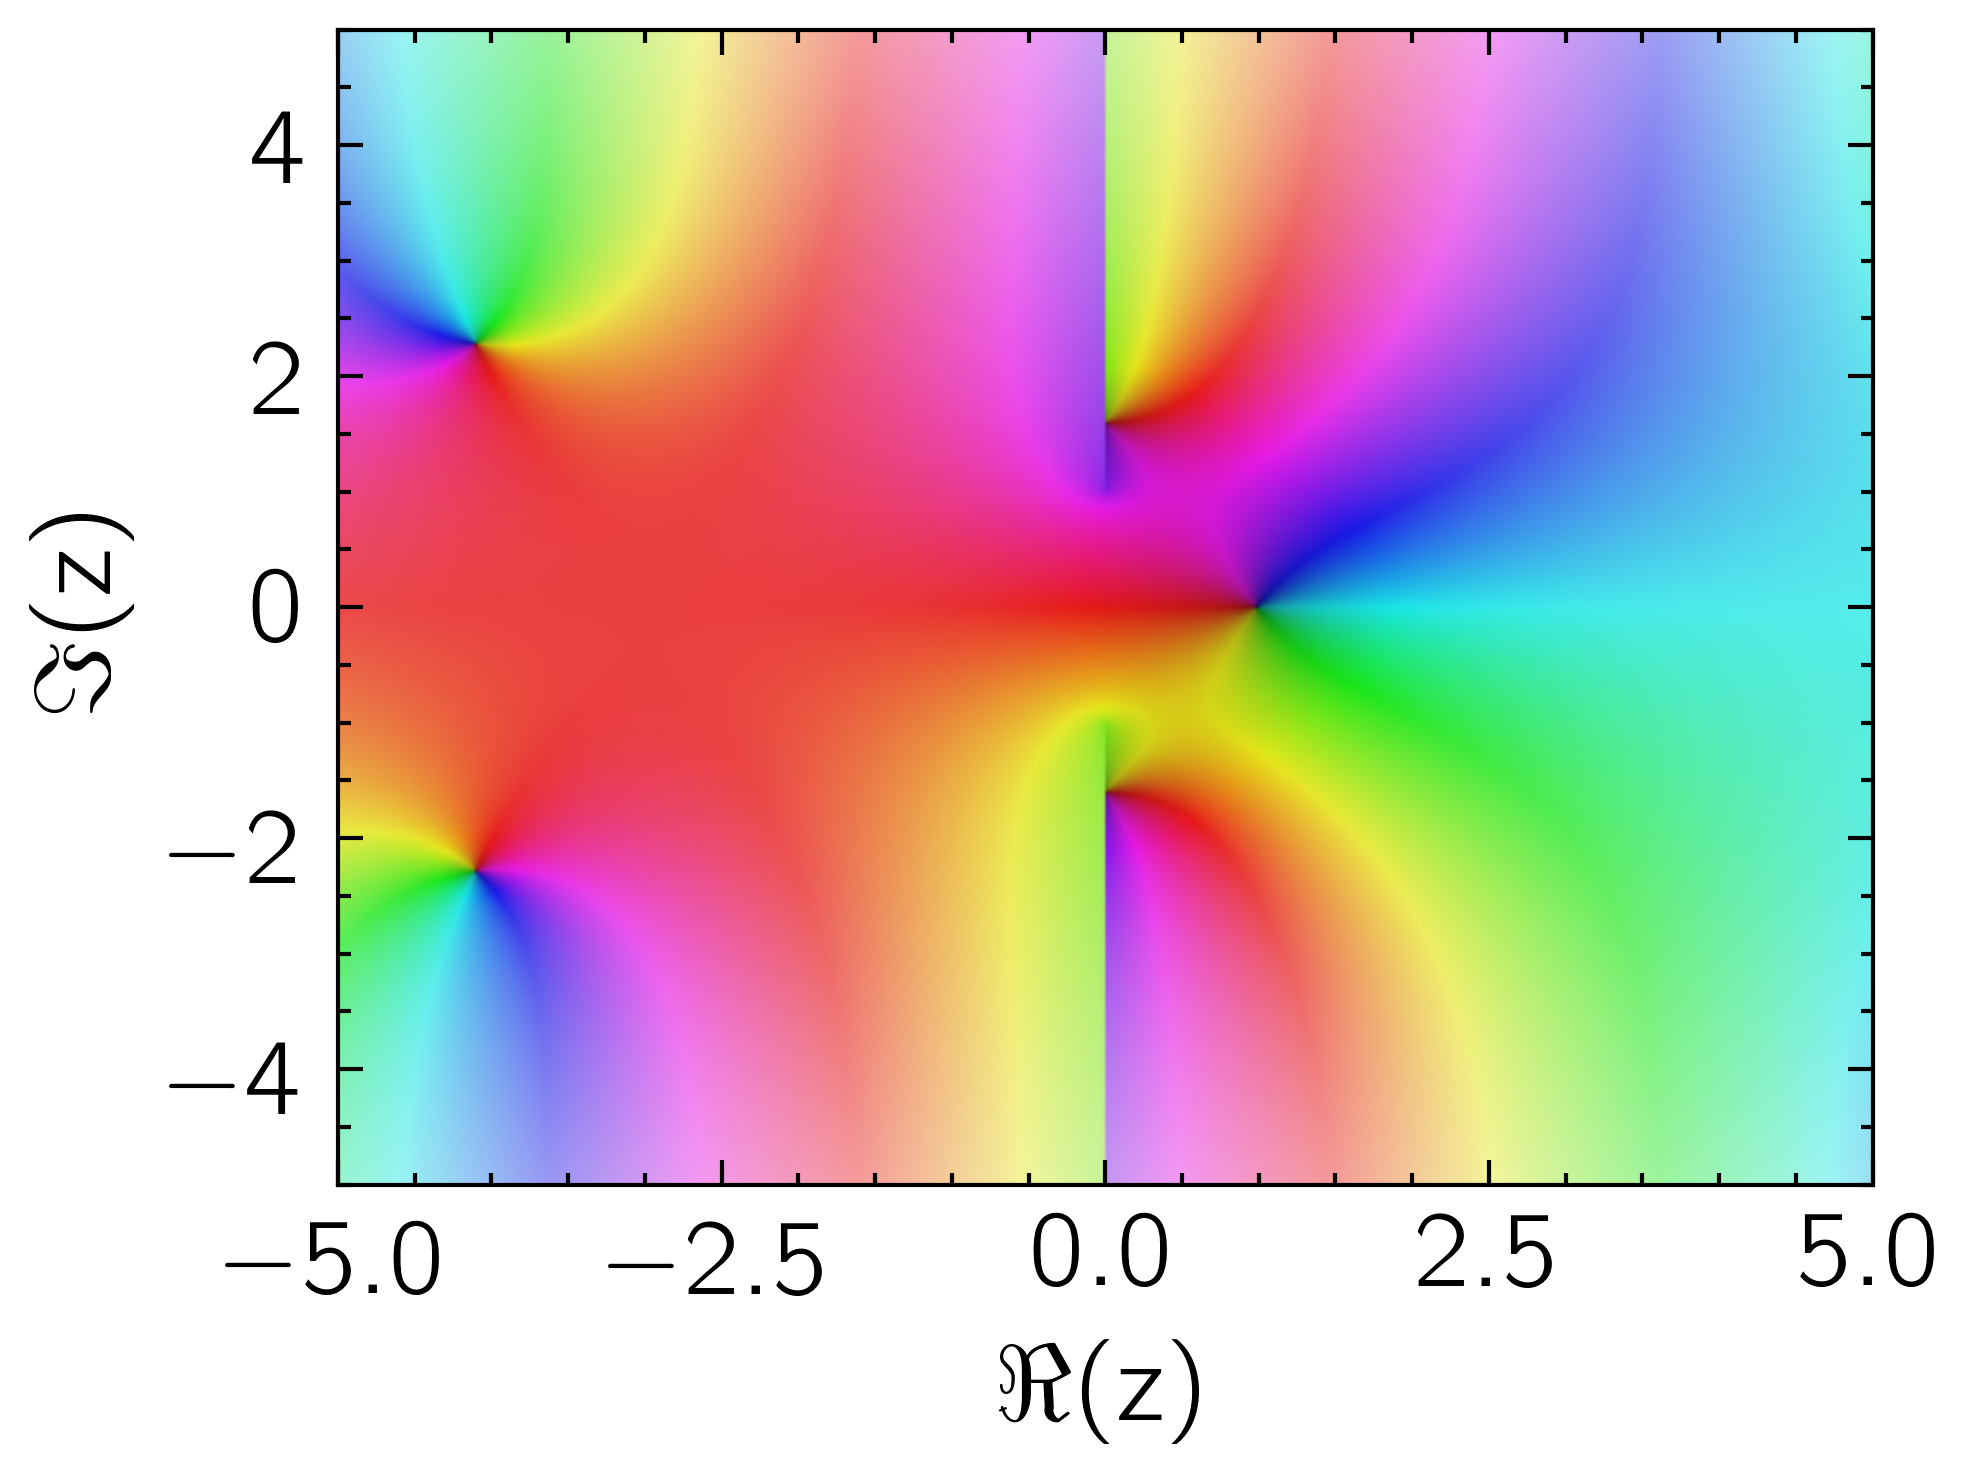

In [4]:
fig, ax = plt.subplots()
phase_plot(f, ax, domain=[-5,5,-5,5])
plt.savefig("figures/branch_cutttt.pdf")

In [37]:
r2 = AAA(f_prime(z)/f(z), z)

/home/jakeb/development/poles-and-roots/src/poles_roots/aaa.py:197: RuntimeWarning: AAA failed to converge within 100 iterations.
  self._compute_AAA(f, z, rtol, max_terms)


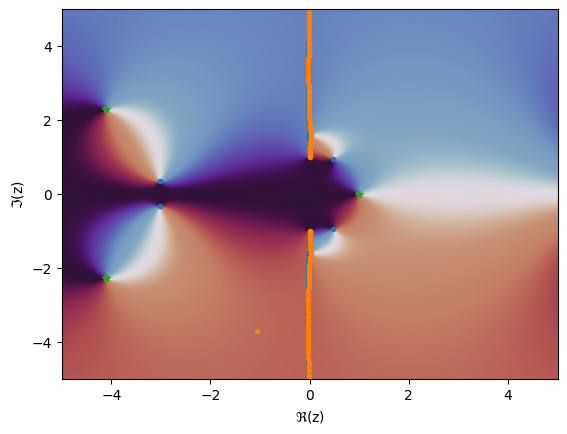

In [42]:
fig, ax = plt.subplots()
phase_plot(lambda z: f_prime(z)/f(z), ax, domain=[-5,5,-5,5])
plt.plot(r2.roots.real, r2.roots.imag, '.')
plt.plot(r2.poles.real, r2.poles.imag, '.')
mask = np.isclose(r2.residues, 1)
plt.plot(r2.poles.real[mask], r2.poles.imag[mask], '*')

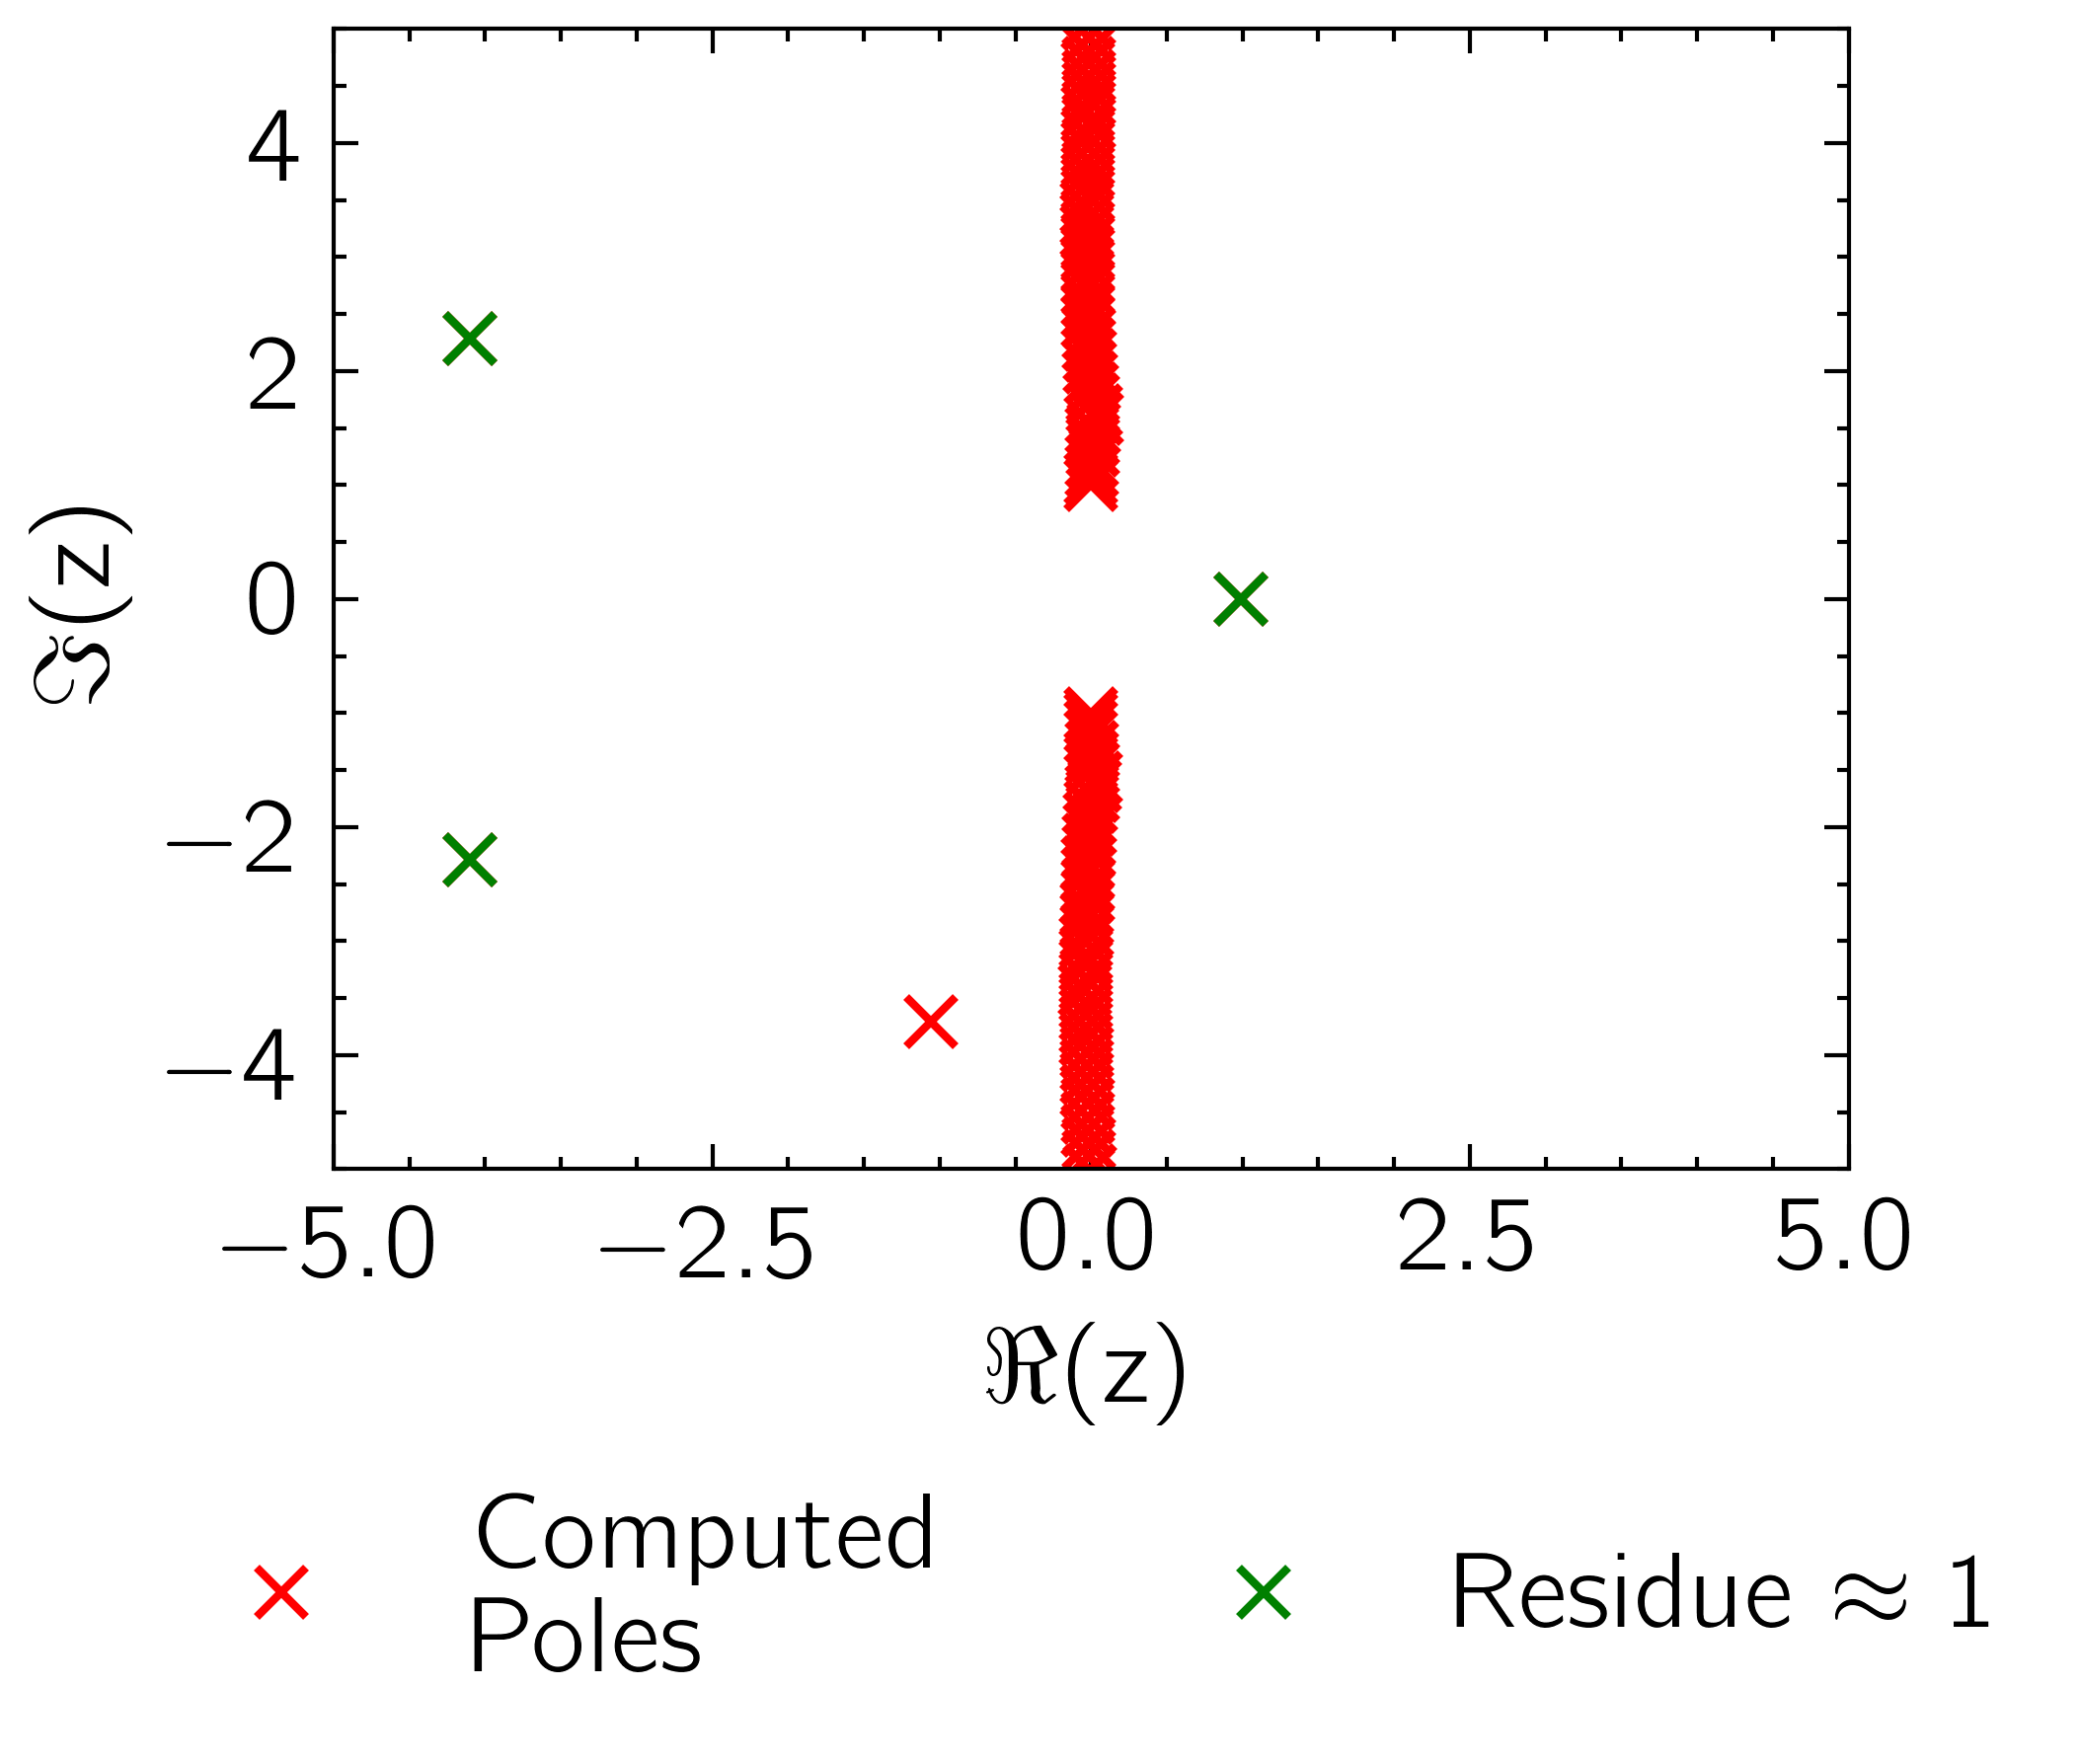

In [111]:
fig, ax = plt.subplots()
mask = np.isclose(r2.residues, 1)
ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
plt.plot(r2.poles.real, r2.poles.imag, 'rx', label="Computed\nPoles")
plt.plot(r2.poles.real[mask], r2.poles.imag[mask], 'gx', label=r"Residue $\approx 1$")
ax.legend(loc='upper center',bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=2)
ax.set_xlabel(r"$\Re$(z)")
ax.set_ylabel(r"$\Im$(z)")
plt.savefig("figures/f_poles.pdf")

In [95]:
r3 = AAA(F(z), z)

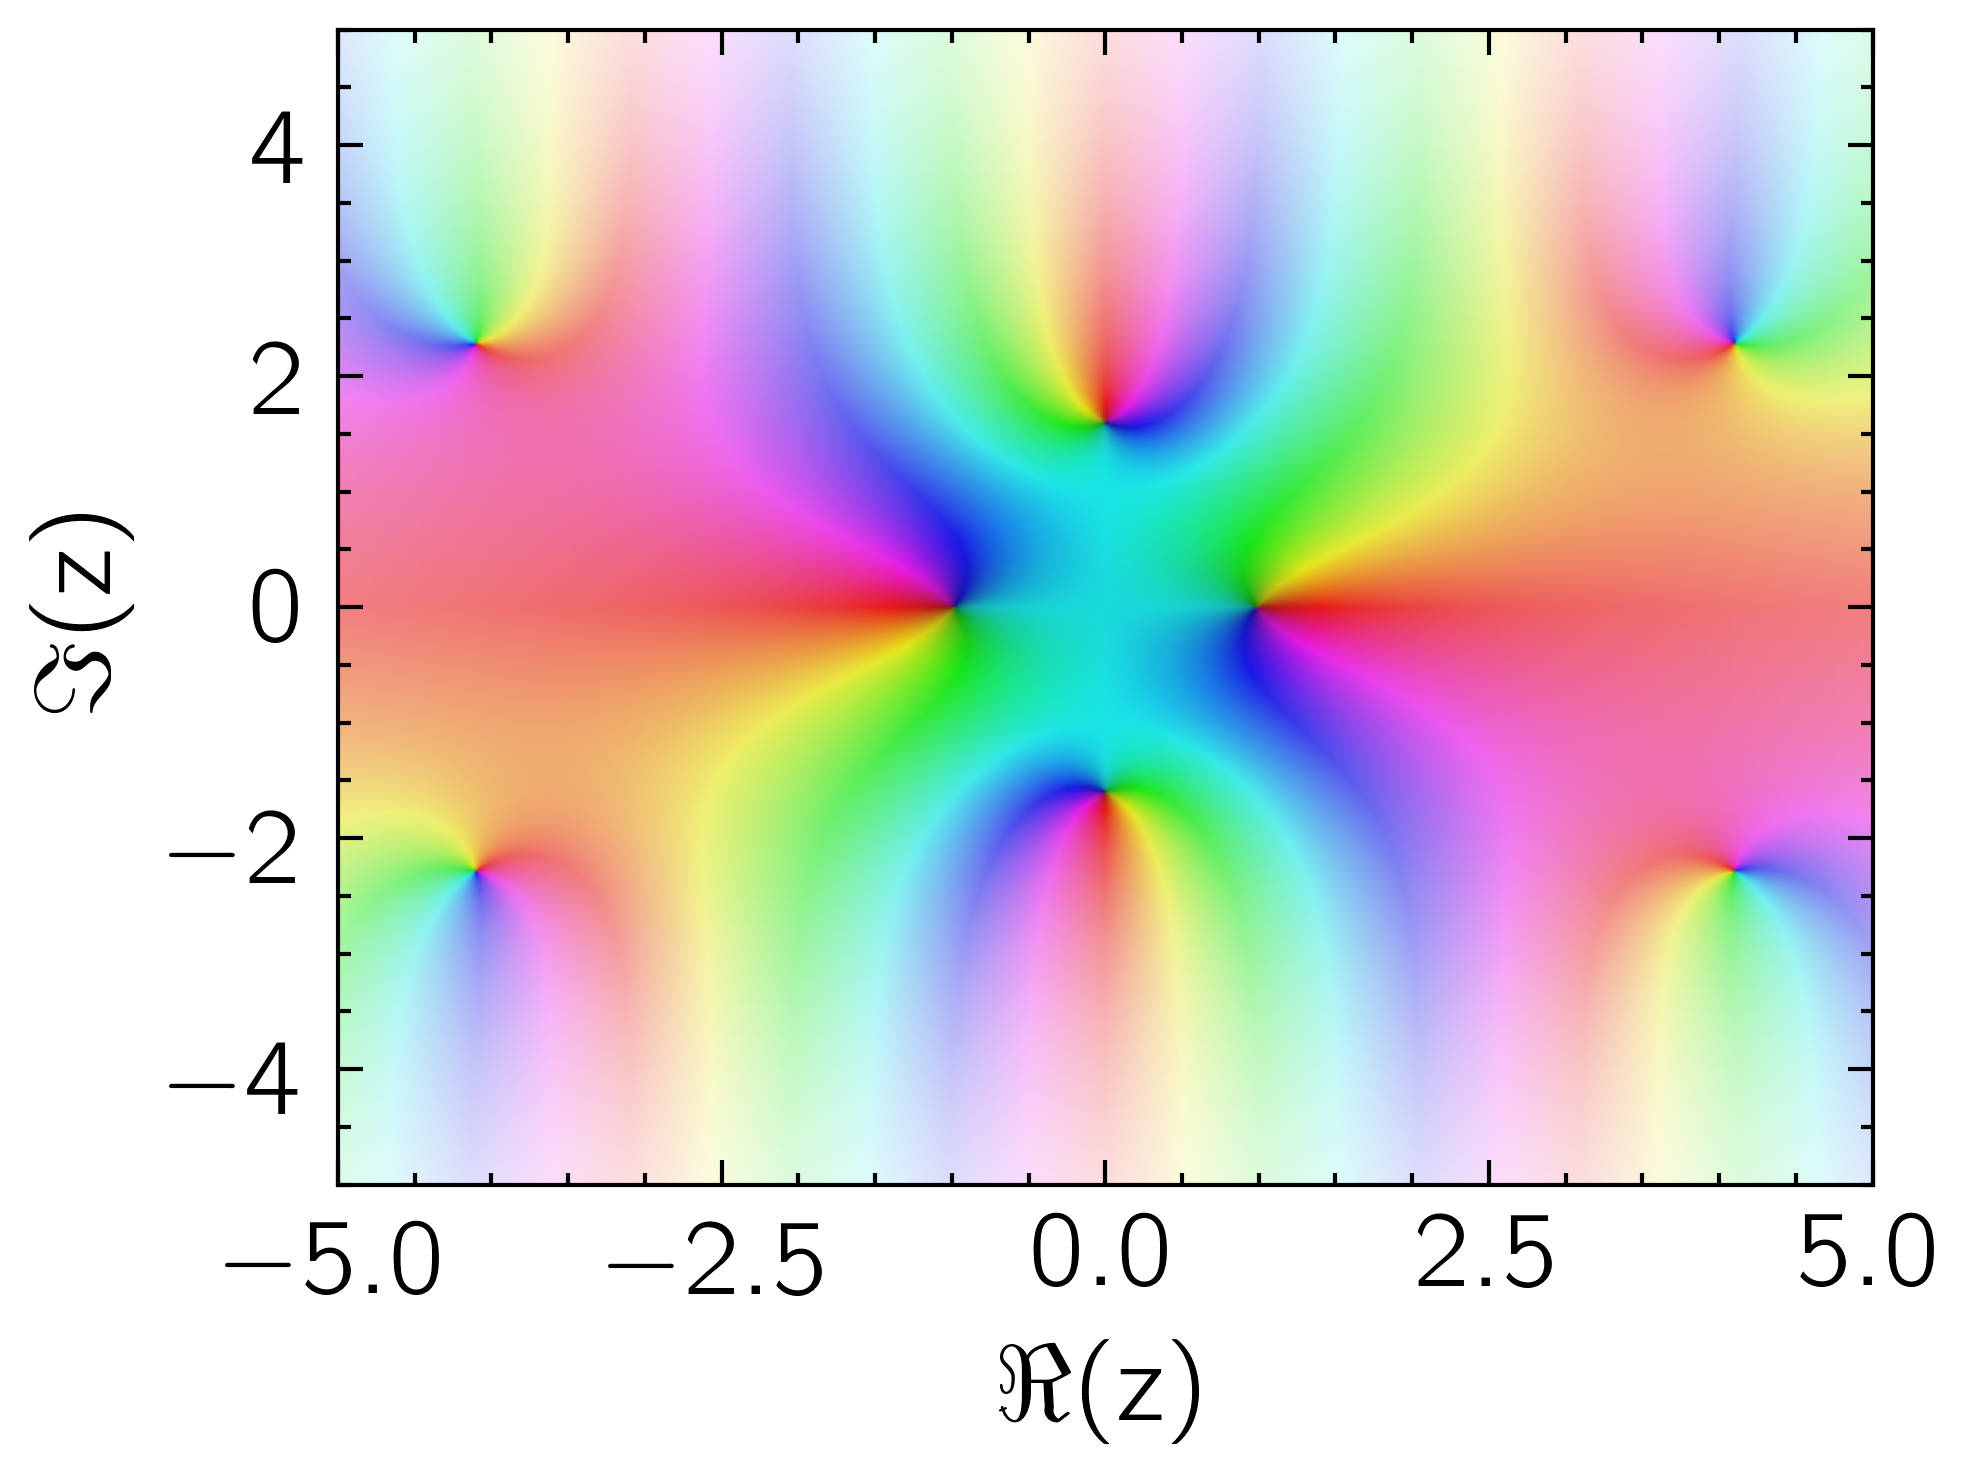

In [5]:
fig, ax = plt.subplots()
phase_plot(F, ax, domain=[-5,5,-5,5])
plt.savefig("figures/F.pdf")

In [89]:
r4 = AAA(F_prime(z)/F(z), z)

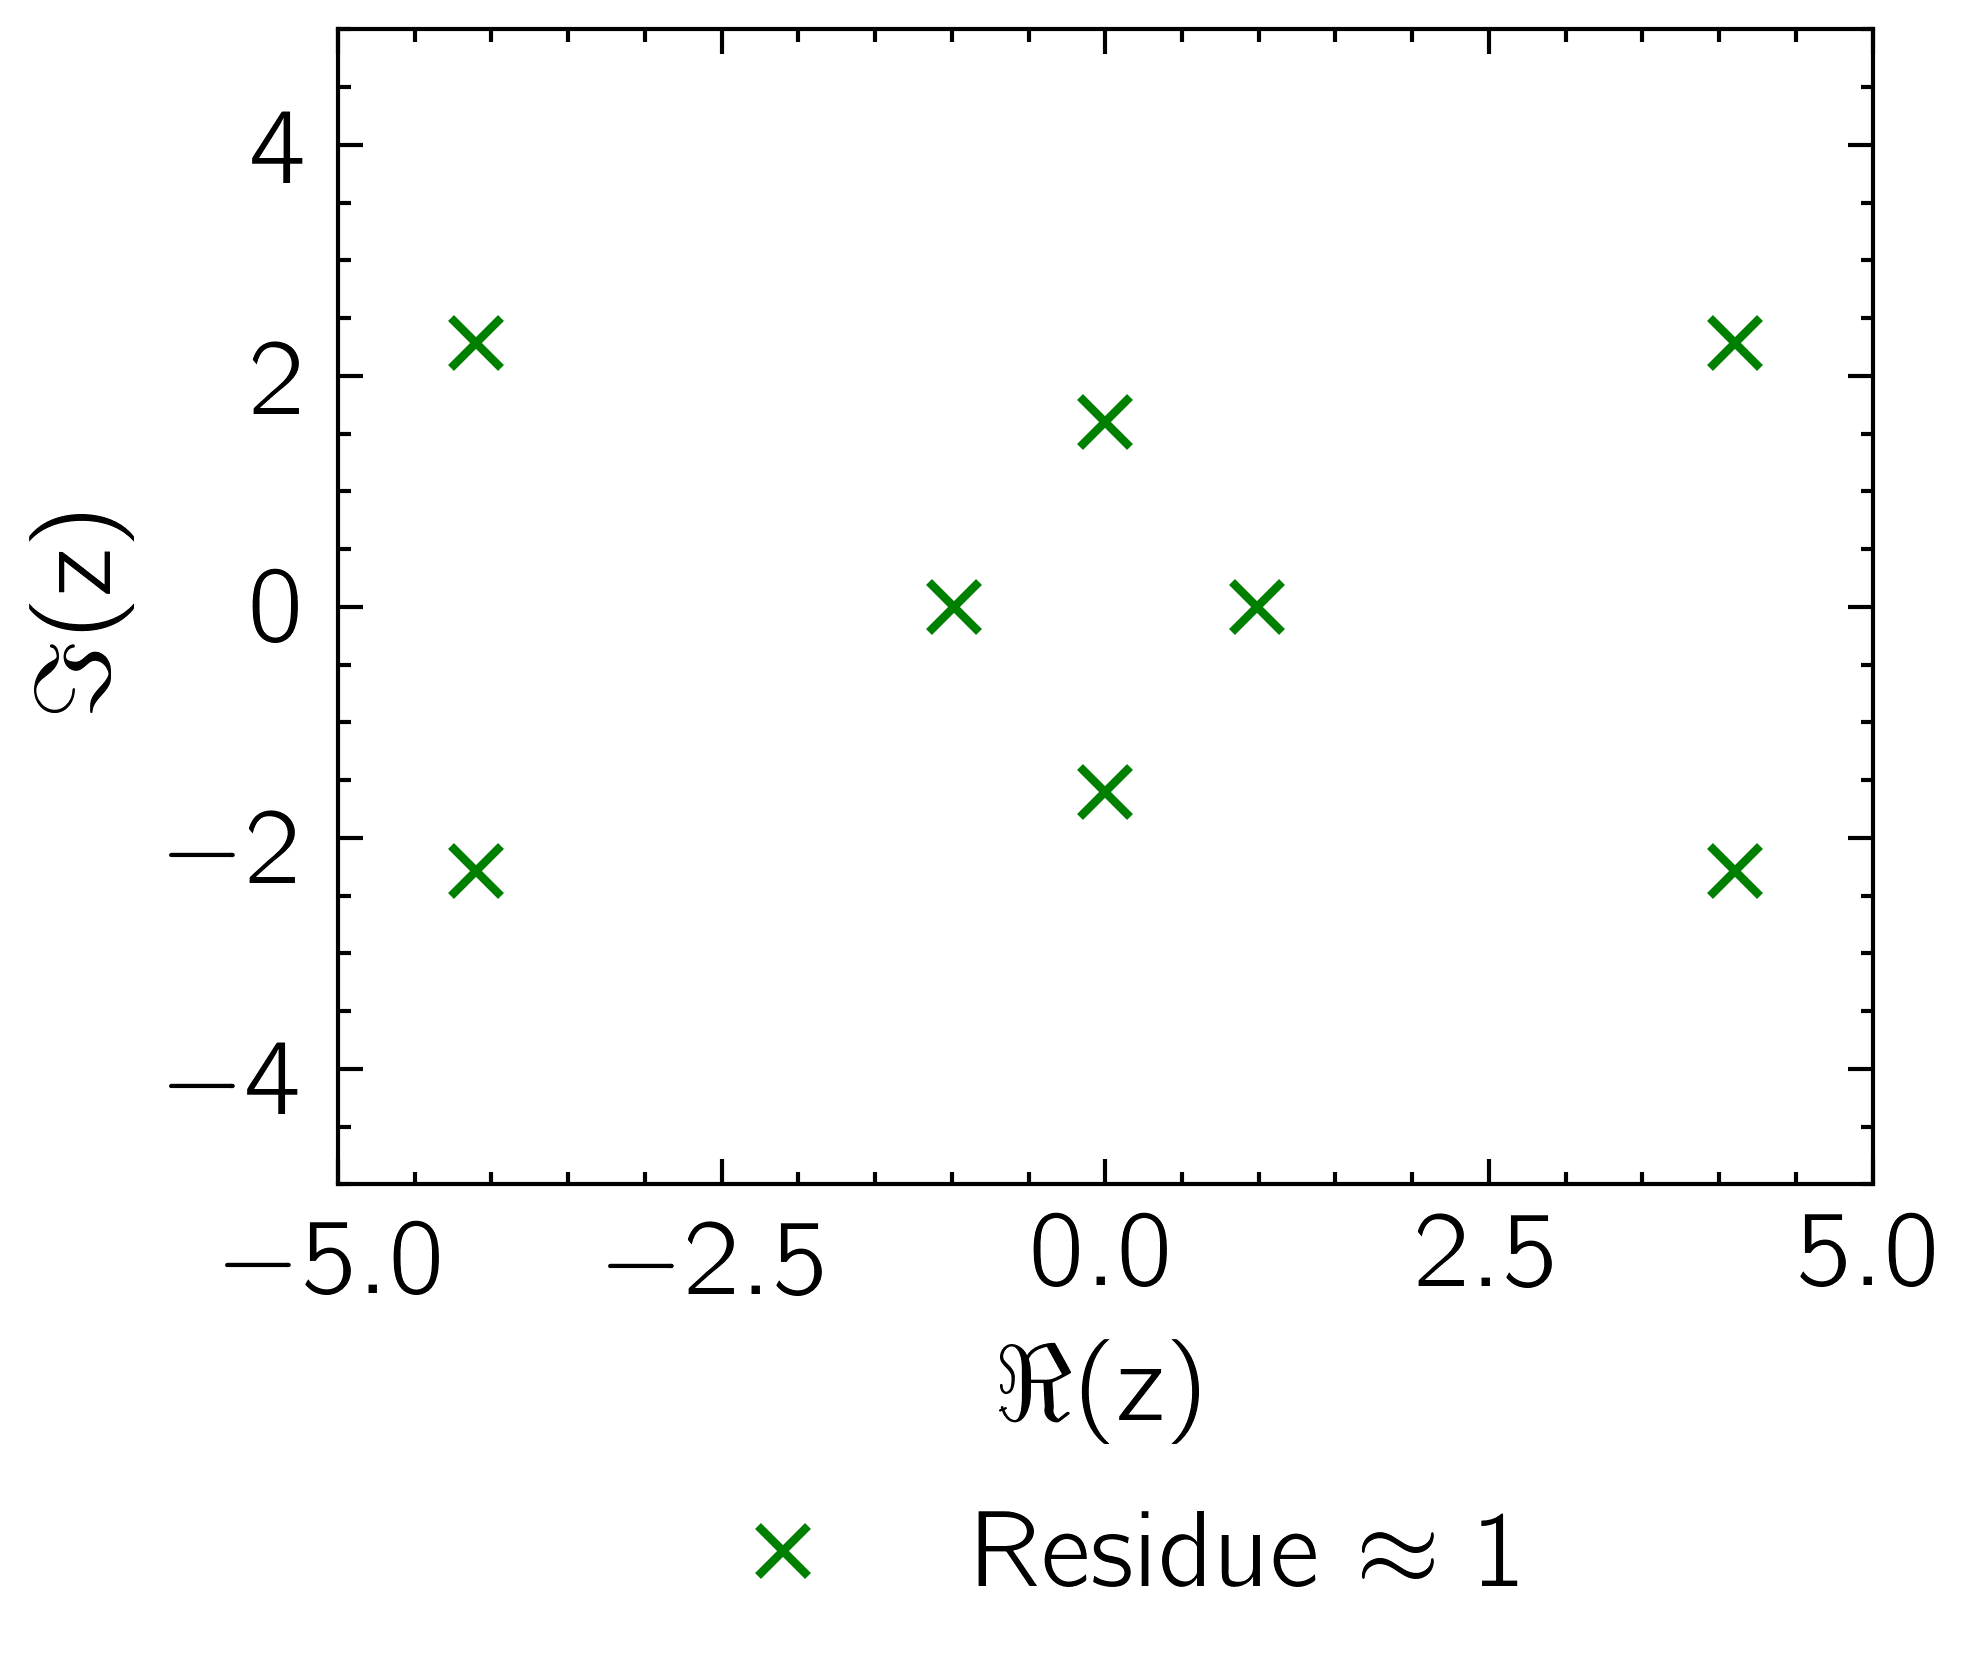

In [110]:
fig, ax = plt.subplots()

ax.set_xlim([-5,5])
ax.set_ylim([-5,5])
mask = np.isclose(r4.residues, 1)
plt.plot(r4.poles.real[mask], r4.poles.imag[mask], 'xg', label=r"Residue $\approx 1$")
ax.legend(loc='upper center',bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=2)
ax.set_xlabel(r"$\Re$(z)")
ax.set_ylabel(r"$\Im$(z)")
plt.savefig("figures/F_poles.pdf")